# Transfer function  3D-Plot

In this demo you can draw the 3d plot of a transfer function $\mid H(z)\mid = \frac{\sum\limits_{i= 0}^{n} b_i z^{i}}{\sum\limits_{i= 0}^{n} a_i z^{i}}$. In a pole (denominator becomes 0) the transfer function goes to infinity, in a zero (numerator becomes 0) the transfer function becomes 0.

Enter numerator(e.g. s^2 + s -> 1,1,0): 8000
Enter denominator(e.g. s^2 + s -> 1,1,0): 0.0015,0.065,0.789,7.365,95.154


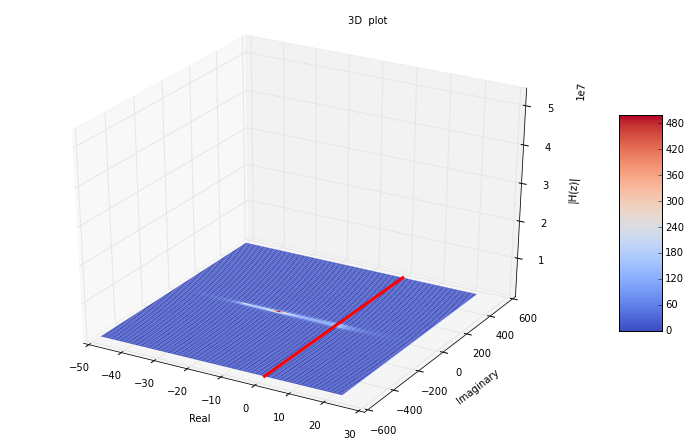

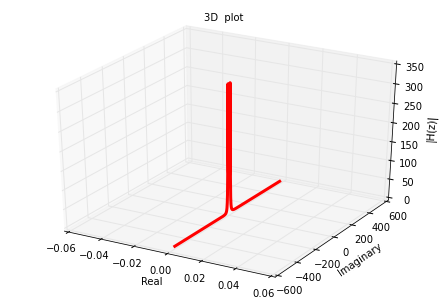

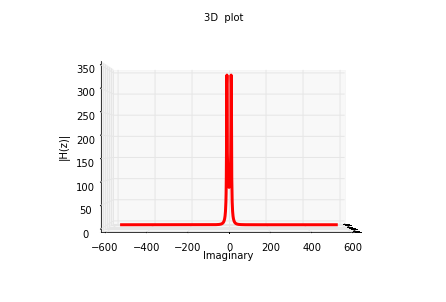

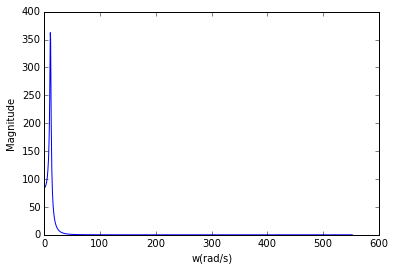

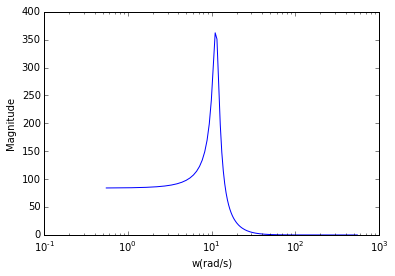

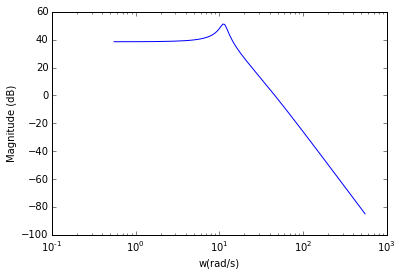

In [8]:
from TransfertFunction3DPlot import *
%matplotlib inline

# A method for evaluating the transfer function using Horner scheme.
def evaluate_fractional_polynomal(num,den,x,y):
    Z = x + y*1j
    numerator = num[0]
    for k in range(1,len(num)):
        numerator = (numerator * Z)+num[k]
    denominator = den[0]
    for l in range(1,len(den)):
        denominator = (denominator*Z) + den[l]
    if len(num) == 1 and len(den) == 1: 
        if not isinstance(Z[0],np.ndarray):
            result = np.ones(len(Z))*(numerator/denominator)
        else:
            result = np.ones((len(Z),len(Z[0])))*(numerator/denominator)
        return result
    else:
        return numerator/denominator

# Handeling user input
num,den = [0],[0]
while num == [0] or den == [0]:
    num = input_handler("Enter numerator(e.g. s^2 + s -> 1,1,0): ")
    den = input_handler("Enter denominator(e.g. s^2 + s -> 1,1,0): ")
# Calculation the zero and poles by converting transferfunction to zero pole representation. (ref: H5-Continu Time systems, Transfert Function)
z,p,k = sig.tf2zpk(num,den)
z,p = cround(z,3),cround(p,3)
# Calculation optimal ranges for drawing
x_min,x_max,y_min,y_max,z_min,z_max = dynamic_axis(z,p,k)
X = np.arange(x_min, x_max, (x_max-x_min)/2.**10)
Y = np.arange(y_min, y_max, (y_max-y_min)/2.**10)
xx,yy = np.meshgrid(X,Y)
# Evaluate function for the given points
zz = np.abs(evaluate_fractional_polynomal(num,den,xx,yy))
# We calculate the values of the points on the imaginairy axis
x0 = np.zeros(2**10)
y0 = np.arange(y_min, y_max, (y_max-y_min)/2.**10)
z0 = np.abs(evaluate_fractional_polynomal(num,den,x0,y0))
display_latex(TEXT1)
# Draw the 3D plot with line on imaginary axis
draw_3d_plot(xx,yy,zz,z_min,z_max,x0,y0,z0)
# Draw line on the imaginary axis
display_latex(TEXT2)
draw_line(x0,y0,z0)
# Draw line on the imaginary axis, changed view
display_latex(TEXT3)
draw_line(x0,y0,z0,True)
# Calculate bode
mag, phase,omega = control.bode(control.tf(num,den),omega=np.linspace(0,y_max,1000),dB=False,Plot=False)
# Draw bode
display_latex(TEXT4)
draw_bode(omega,mag)
plt.show()
# Scale the x axis logaritmic
display_latex(TEXT5)
draw_bode(omega, mag,True)
plt.show()
# Scale the y axis to dB
mag = 20 *np.log10(mag)
display_latex(TEXT6)
draw_bode(omega, mag,True,True)
plt.show()
